# **Diabetes Prediction**


The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

**Data contains;**

1. **Pregnancies:** Number of times pregnant

2. **Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test

3. **BloodPressure:** Diastolic blood pressure (mm Hg)

4. **SkinThickness:** Triceps skin fold thickness (mm)

5. **Insulin:** 2-Hour serum insulin (mu U/ml)

6. **BMI:** Body mass index (weight in kg/(height in m)^2)

7. **DiabetesPedigreeFunction:** Diabetes pedigree function

8. **Age:** Age (years)

9. **Outcome:** 1 if diabetes, 0 if no diabetes

**Load the important required libraries**

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

**Let us load the data set**

In [2]:
diab_df= pd.read_csv('diabetes.csv')

### **Data Analysis On Diabetes Data Set**

**Checking first 5 and last 5 records from the datasets**

In [3]:
diab_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diab_df.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


**Let's check the duplicate data in data set**

In [5]:
diab_df.duplicated().sum()

0

In [6]:
diab_df.shape

(768, 9)

In [7]:
diab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
diab_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**So, there 768 records in 9 columns. Also, there are no null records as well as duplicate values.**

In [9]:
diab_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diab_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [10]:
diab_df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

**We can see here that, there were lot of 0s present in the above mentioned columns.**

**To fill these 0s with Nan values the let's see the data distribution.**

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

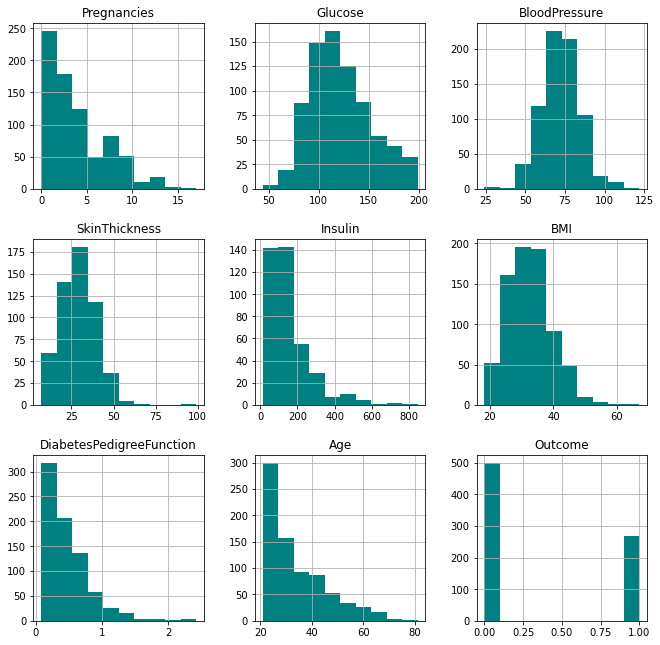

In [11]:
diab_df.hist(figsize = (11,11), color="#008080")

**Let's aim to replace NaN values for the columns in accordance with their distribution**

In [12]:
diab_df['Glucose'].fillna(diab_df['Glucose'].mean(), inplace = True)
diab_df['BloodPressure'].fillna(diab_df['BloodPressure'].mean(), inplace = True)
diab_df['SkinThickness'].fillna(diab_df['SkinThickness'].median(), inplace = True)
diab_df['Insulin'].fillna(diab_df['Insulin'].median(), inplace = True)
diab_df['BMI'].fillna(diab_df['BMI'].median(), inplace = True)

In [13]:
diab_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**After replacing NaN Values, the dataset is almost clean now. We can move ahead with our EDA.**

In [14]:
diab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


### **Exploratory Data Analysis**

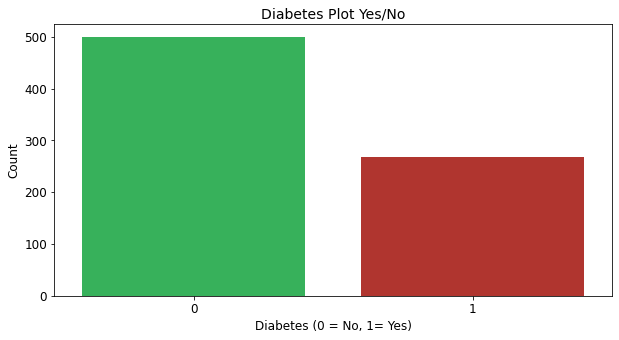

In [15]:
plt.figure(figsize=(10,5))
plt.title('Diabetes Plot Yes/No', fontsize=14)
sns.countplot(x="Outcome", data=diab_df, palette=('#23C552','#C52219'))
plt.xlabel("Diabetes (0 = No, 1= Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**From above plot, we can say that there are less number of diabetic patients in the data set.**

Text(0.5, 1.0, 'Diabetes Outcome vs Age')

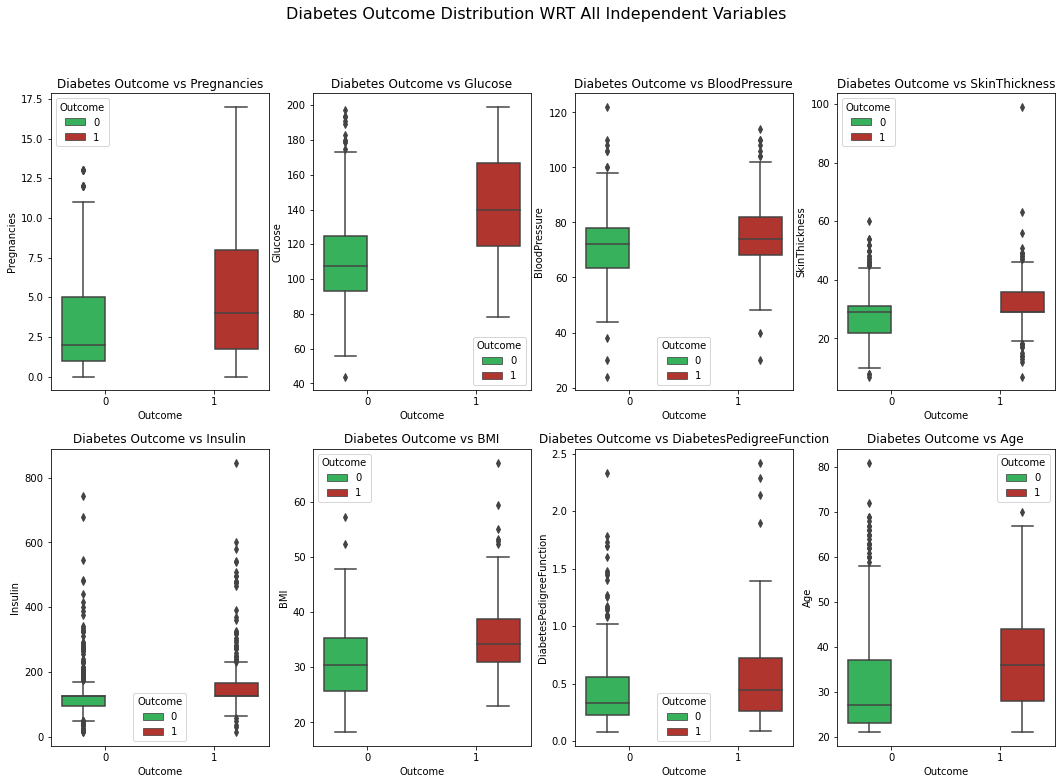

In [16]:
fig, axes = plt.subplots(2, 4, figsize=(18, 12))
fig.suptitle('Diabetes Outcome Distribution WRT All Independent Variables', fontsize=16)

sns.boxplot(ax=axes[0, 0], x=diab_df['Outcome'], y=diab_df['Pregnancies'], hue=diab_df['Outcome'], palette=('#23C552','#C52219'))
axes[0, 0].set_title("Diabetes Outcome vs Pregnancies", fontsize=12)

sns.boxplot(ax=axes[0, 1], x=diab_df['Outcome'], y=diab_df['Glucose'], hue=diab_df['Outcome'], palette=('#23C552','#C52219'))
axes[0, 1].set_title("Diabetes Outcome vs Glucose", fontsize=12)

sns.boxplot(ax=axes[0, 2], x=diab_df['Outcome'], y=diab_df['BloodPressure'], hue=diab_df['Outcome'], palette=('#23C552','#C52219'))
axes[0, 2].set_title("Diabetes Outcome vs BloodPressure", fontsize=12)

sns.boxplot(ax=axes[0, 3], x=diab_df['Outcome'], y=diab_df['SkinThickness'], hue=diab_df['Outcome'], palette=('#23C552','#C52219'))
axes[0, 3].set_title("Diabetes Outcome vs SkinThickness", fontsize=12)

sns.boxplot(ax=axes[1, 0], x=diab_df['Outcome'], y=diab_df['Insulin'], hue=diab_df['Outcome'], palette=('#23C552','#C52219'))
axes[1, 0].set_title("Diabetes Outcome vs Insulin", fontsize=12)

sns.boxplot(ax=axes[1, 1], x=diab_df['Outcome'], y=diab_df['BMI'], hue=diab_df['Outcome'], palette=('#23C552','#C52219'))
axes[1, 1].set_title("Diabetes Outcome vs BMI", fontsize=12)

sns.boxplot(ax=axes[1, 2], x=diab_df['Outcome'], y=diab_df['DiabetesPedigreeFunction'], hue=diab_df['Outcome'], palette=('#23C552','#C52219'))
axes[1, 2].set_title("Diabetes Outcome vs DiabetesPedigreeFunction", fontsize=12)

sns.boxplot(ax=axes[1, 3], x=diab_df['Outcome'], y=diab_df['Age'], hue=diab_df['Outcome'], palette=('#23C552','#C52219'))
axes[1, 3].set_title("Diabetes Outcome vs Age", fontsize=12)

**From above Boxplot, we can see that those who are diabetic tends to have higher Glucose levels, Age, BMI, Pregnancies and Insulin measures.**

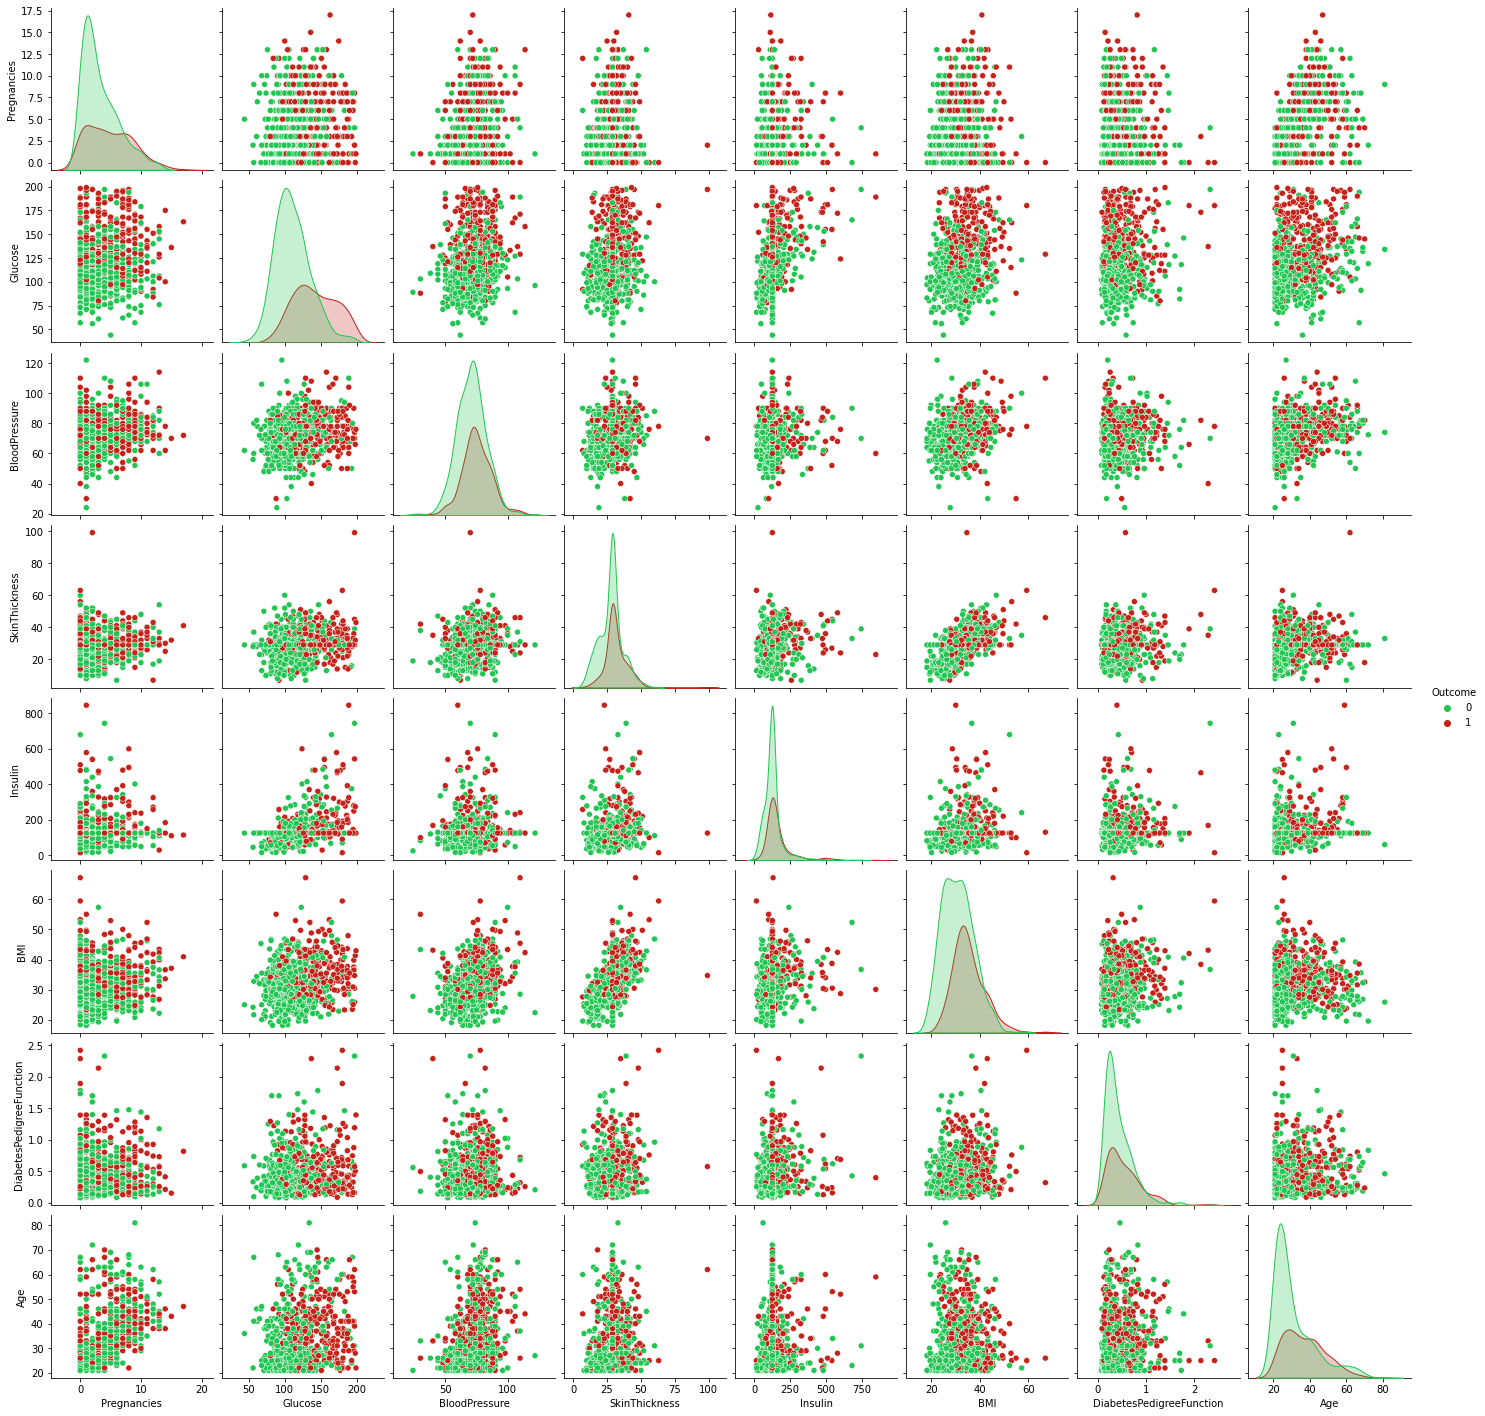

In [17]:
sns.pairplot(diab_df, hue='Outcome', palette=('#23C552','#C52219'))

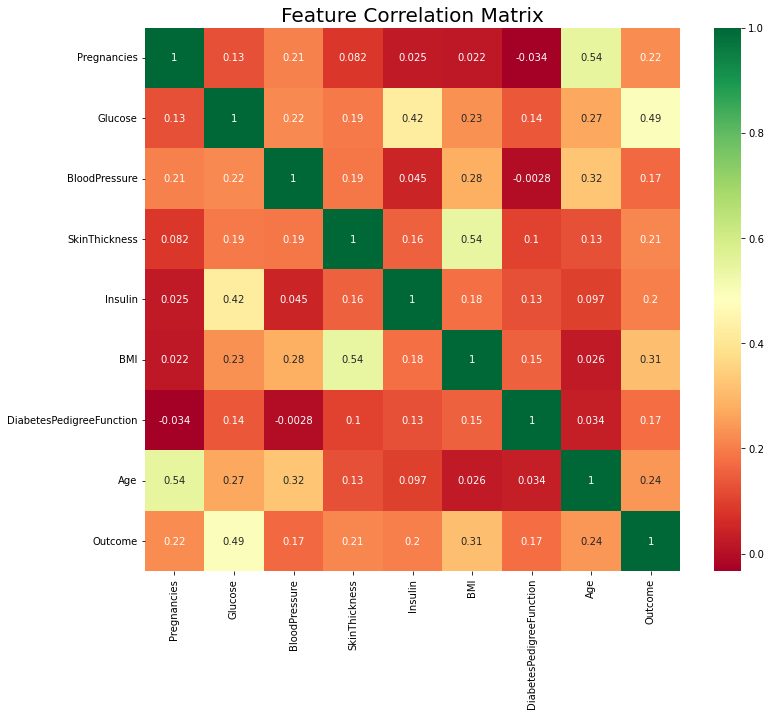

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(diab_df.corr(), annot=True, cmap='RdYlGn')
plt.title("Feature Correlation Matrix",fontsize=20)
plt.show()

**We can see that a few of the features are moderately correlated - Age and number of Pregnancies, Insulin and Glucose levels, Skin Thickness and BMI - but not so much as to cause concern.**

### **Modelling**

In [18]:
diab_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [24]:
diab_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

**Here we have just checked the distribution.**

**First Let's split the data in to x and y.**

In [25]:
from sklearn.model_selection import train_test_split
x = diab_df.drop(['Outcome'],axis=1)
y = diab_df['Outcome']

**Then we use the standard scaler to scale the data.**

In [26]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
x_scaled= sc.fit_transform(x)

**First Let's split the data into train and test.**

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=0)

In [28]:
x_train.shape, y_train.shape

((537, 8), (537,))

In [29]:
x_test.shape, y_test.shape

((231, 8), (231,))

### **Applying Logistic Regression**

In [33]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

**Computing confusion matrix**

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
confmat = confusion_matrix(y_pred, y_test)
confmat

array([[140,  38],
       [ 17,  36]], dtype=int64)

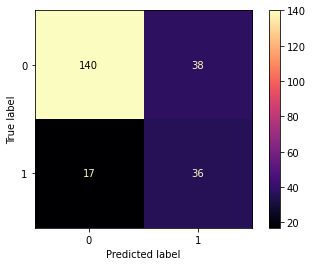

In [35]:
from sklearn import metrics
cm=metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_pred,y_test,labels=logreg.classes_),
                              display_labels=logreg.classes_)
cm.plot(cmap="magma")

In [36]:
accuracy_score(y_pred, y_test)

0.7619047619047619

### **Model Accuracy with Logistic Regression: 76.19%**

### **Applying Random Forest**

In [37]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

**Computing Confusin Matrix**

In [38]:
confmat1 = confusion_matrix(y_pred, y_test)
confmat1

array([[138,  34],
       [ 19,  40]], dtype=int64)

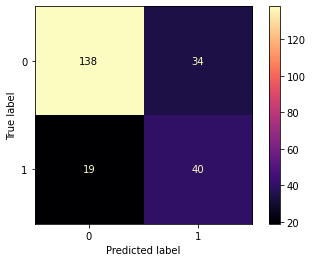

In [39]:
from sklearn import metrics
cm=metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_pred,y_test,labels=random_forest.classes_),
                              display_labels=random_forest.classes_)
cm.plot(cmap="magma")

In [40]:
accuracy_score(y_pred, y_test)

0.7705627705627706

### **Model Accuracy with Random Forest: 77.05%**